In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
from scipy import stats

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [11]:
Fifa = pd.read_csv('Fifa_Clean.csv')
x = pd.read_csv('Fifa_x.csv')
y = pd.read_csv('Fifa_y.csv')

Fifa.drop(['Unnamed: 0'], axis=1, inplace=True)
x.drop(['Unnamed: 0'], axis=1, inplace=True)
y.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

model = sm.OLS(y_train,x_train).fit()
predictions = model.predict(x_test)

# Scores
r2 = r2_score(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = math.sqrt(mse)

print('r2 score =',r2)
print('Mean squared error =',mse)
print('Root mean squared error =',rmse)


r2 score = 0.9209543319586249
Mean squared error = 2.5691475603190073
Root mean squared error = 1.6028560635063298


In [13]:
y_test.max()

pot    93
dtype: int64

In [14]:
total = Fifa[(Fifa['pot']>92)].sort_values('ova',ascending=False).sort_values('age').sort_values('pot',ascending=False)

attackers_list = ['ST','CF','LW','RW']
attackers = Fifa[(Fifa['pot']>90)&(Fifa['bp'].isin(attackers_list))].sort_values('ova',ascending=False).sort_values('age').sort_values('pot',ascending=False)
midfielders_list = ['CM','LDM','LAM','RDM','RAM','CDM','CAM','LM','RM']
midfielders = Fifa[(Fifa['pot']>90)&(Fifa['bp'].isin(midfielders_list))].sort_values('ova',ascending=False).sort_values('age').sort_values('pot',ascending=False)
defenders_list = ['CB','LCB','RCB','LB','RB']
defenders = Fifa[(Fifa['pot']>90)&(Fifa['bp'].isin(defenders_list))].sort_values('ova',ascending=False).sort_values('age').sort_values('pot',ascending=False)


In [15]:
attackers.head(1)

,name,age,ova,nationality,bov,bp,position,pot,height,weight,foot,growth,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
9331,K. Mbappé,21,90,France,91,ST,ST LW RW,95,70,161,Right,5,408,78,91,73,83,83.0,394,92,79.0,63,70,90,458,96,96,92.0,92,82.0,404,86,77.0,86,76,79,341,62,38.0,91.0,80.0,70,84.0,100,34,34,32.0,42,13,5,7,11,6,2147,466,4,5,High,Low,3,96,86,78,91,39,76,1,88,88,88,89,89,89,89,89,87,87,87,87,79,79,79,87,67,63,63,63,67,63,55,55,55,63,18


In [16]:
midfielders.head(1)

,name,age,ova,nationality,bov,bp,position,pot,height,weight,foot,growth,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
11207,Vinícius Jr.,19,80,Brazil,81,RM,LW,93,69,161,Right,13,331,71,68,50,72,70.0,379,88,77.0,62,67,85,441,95,95,94.0,75,82.0,357,73,75.0,79,62,68,297,58,26.0,75.0,73.0,65,74.0,75,32,25,18.0,36,5,7,7,7,10,1916,417,4,5,High,Medium,2,95,69,71,87,29,66,1,74,74,74,80,78,78,78,80,78,78,78,79,70,70,70,79,59,54,54,54,59,54,44,44,44,54,15


In [17]:
defenders.head(1)

,name,age,ova,nationality,bov,bp,position,pot,height,weight,foot,growth,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
10212,M. de Ligt,20,85,Netherlands,87,CB,CB,92,74,196,Right,7,308,52,50,86,75,45.0,319,66,48.0,55,74,76,343,68,75,56.0,84,60.0,396,82,84.0,76,88,66,313,83,83.0,44.0,63.0,40,82.0,253,86,85,82.0,56,12,11,11,12,10,1988,435,4,2,Medium,High,3,72,59,66,69,85,84,524,68,68,68,65,67,67,67,65,67,67,67,67,72,72,72,67,76,80,80,80,76,78,84,84,84,78,19


In [18]:
print(len(x_test))
print(len(predictions))

3425
3425


<function matplotlib.pyplot.show(close=None, block=None)>

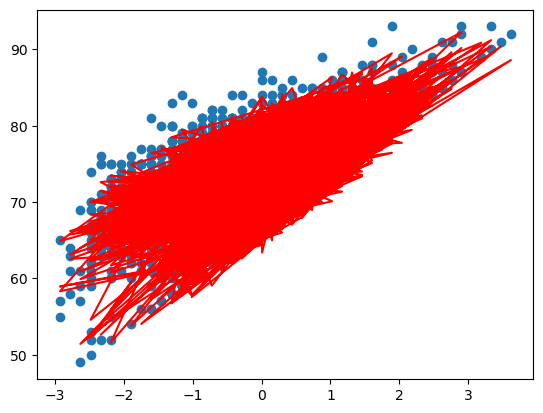

In [19]:
plt.scatter(x_test['ova'],y_test)
plt.plot(x_test['ova'], predictions, color='red')
plt.show